In [48]:
#Python House Price Project Kaggle


In [132]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [133]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [134]:
print(train.shape)
print(test.shape)

(1460, 81)
(1459, 80)


(array([   7.,   15.,   53.,   73.,  153.,  227.,  188.,  155.,  141.,
          88.,   78.,   66.,   44.,   42.,   20.,   29.,   20.,    8.,
          10.,   13.,    7.,    5.,    4.,    3.,    1.,    2.,    0.,
           1.,    2.,    0.,    1.,    0.,    2.,    0.,    0.,    0.,
           0.,    0.,    0.,    2.]),
 array([  34900. ,   52902.5,   70905. ,   88907.5,  106910. ,  124912.5,
         142915. ,  160917.5,  178920. ,  196922.5,  214925. ,  232927.5,
         250930. ,  268932.5,  286935. ,  304937.5,  322940. ,  340942.5,
         358945. ,  376947.5,  394950. ,  412952.5,  430955. ,  448957.5,
         466960. ,  484962.5,  502965. ,  520967.5,  538970. ,  556972.5,
         574975. ,  592977.5,  610980. ,  628982.5,  646985. ,  664987.5,
         682990. ,  700992.5,  718995. ,  736997.5,  755000. ]),
 <a list of 40 Patch objects>)

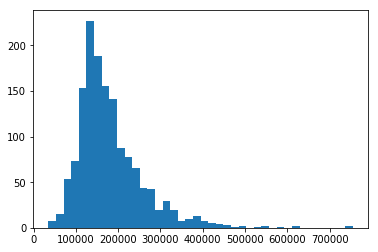

In [135]:
plt.hist(train.SalePrice, bins= 40)

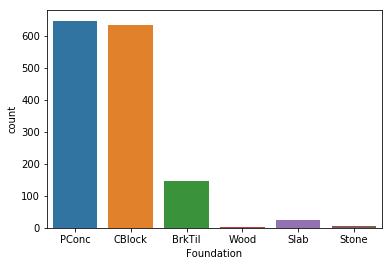

In [136]:
train.Foundation.value_counts()
sns.countplot(train.Foundation)

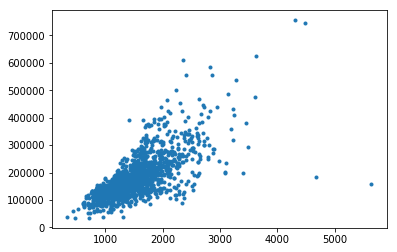

In [137]:
plt.plot(train.GrLivArea, train.SalePrice,'.')


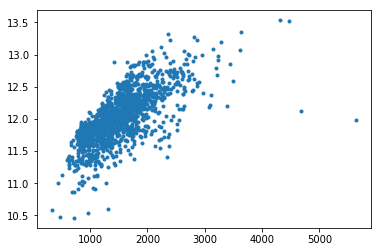

In [138]:
plt.plot(train.GrLivArea, np.log(train.SalePrice),'.')

In [139]:
#Combining two data sets
def count_missing(data):
    null_cols = data.columns[data.isnull().any(axis=0)]
    X_null = data[null_cols].isnull().sum()
    X_null = X_null.sort_values(ascending=False)
    print(X_null)
    
combine = pd.concat([train, test])
count_missing(combine)

PoolQC          2909
MiscFeature     2814
Alley           2721
Fence           2348
SalePrice       1459
FireplaceQu     1420
LotFrontage      486
GarageQual       159
GarageCond       159
GarageFinish     159
GarageYrBlt      159
GarageType       157
BsmtExposure      82
BsmtCond          82
BsmtQual          81
BsmtFinType2      80
BsmtFinType1      79
MasVnrType        24
MasVnrArea        23
MSZoning           4
BsmtFullBath       2
BsmtHalfBath       2
Utilities          2
Functional         2
Electrical         1
BsmtUnfSF          1
Exterior1st        1
Exterior2nd        1
TotalBsmtSF        1
GarageCars         1
BsmtFinSF2         1
BsmtFinSF1         1
KitchenQual        1
SaleType           1
GarageArea         1
dtype: int64


In [140]:
combine.isnull().sum()#gives the missing value of all columns

1stFlrSF            0
2ndFlrSF            0
3SsnPorch           0
Alley            2721
BedroomAbvGr        0
BldgType            0
BsmtCond           82
BsmtExposure       82
BsmtFinSF1          1
BsmtFinSF2          1
BsmtFinType1       79
BsmtFinType2       80
BsmtFullBath        2
BsmtHalfBath        2
BsmtQual           81
BsmtUnfSF           1
CentralAir          0
Condition1          0
Condition2          0
Electrical          1
EnclosedPorch       0
ExterCond           0
ExterQual           0
Exterior1st         1
Exterior2nd         1
Fence            2348
FireplaceQu      1420
Fireplaces          0
Foundation          0
FullBath            0
                 ... 
LotShape            0
LowQualFinSF        0
MSSubClass          0
MSZoning            4
MasVnrArea         23
MasVnrType         24
MiscFeature      2814
MiscVal             0
MoSold              0
Neighborhood        0
OpenPorchSF         0
OverallCond         0
OverallQual         0
PavedDrive          0
PoolArea  

In [141]:
catfeats_fillnaNone = \
    ['Alley',
    'BsmtCond','BsmtQual','BsmtExposure',
    'BsmtFinType1', 'BsmtFinType2',
    'FireplaceQu',
    'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond',
    'PoolQC',
    'Fence',
    'MiscFeature']
 
combine.loc[:,catfeats_fillnaNone] = \
    combine[catfeats_fillnaNone].fillna('None')

In [142]:
numfeats_fillnazero = \
    ['BsmtFullBath', 'BsmtHalfBath', 'TotalBsmtSF',
     'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
     'GarageArea', 'GarageCars']
 
combine.loc[:,numfeats_fillnazero] = \
    combine[numfeats_fillnazero].fillna(0)

In [143]:
count_missing(combine)

SalePrice      1459
LotFrontage     486
GarageYrBlt     159
MasVnrType       24
MasVnrArea       23
MSZoning          4
Utilities         2
Functional        2
SaleType          1
KitchenQual       1
Exterior2nd       1
Exterior1st       1
Electrical        1
dtype: int64


In [144]:
catfeats_fillnamode = \
    ['Electrical', 'MasVnrType', 'MSZoning', 'Functional', 'Utilities',
     'Exterior1st', 'Exterior2nd', 'KitchenQual', 'SaleType']
 
combine.loc[:, catfeats_fillnamode] = \
    combine[catfeats_fillnamode].fillna(combine[catfeats_fillnamode].mode().iloc[0])
 
numfeats_fillnamedian = ['MasVnrArea', 'LotFrontage']
 
combine.loc[:, numfeats_fillnamedian] = \
    combine[numfeats_fillnamedian].fillna(combine[numfeats_fillnamedian].median())


In [145]:
count_missing(combine)

SalePrice      1459
GarageYrBlt     159
dtype: int64


In [146]:
combine.select_dtypes(include = [object]).columns

Index(['Alley', 'BldgType', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
       'BsmtFinType2', 'BsmtQual', 'CentralAir', 'Condition1', 'Condition2',
       'Electrical', 'ExterCond', 'ExterQual', 'Exterior1st', 'Exterior2nd',
       'Fence', 'FireplaceQu', 'Foundation', 'Functional', 'GarageCond',
       'GarageFinish', 'GarageQual', 'GarageType', 'Heating', 'HeatingQC',
       'HouseStyle', 'KitchenQual', 'LandContour', 'LandSlope', 'LotConfig',
       'LotShape', 'MSZoning', 'MasVnrType', 'MiscFeature', 'Neighborhood',
       'PavedDrive', 'PoolQC', 'RoofMatl', 'RoofStyle', 'SaleCondition',
       'SaleType', 'Street', 'Utilities'],
      dtype='object')

In [147]:
#Model Building 
from sklearn.linear_model import LinearRegression

In [148]:
print(test2.shape)

(1459, 81)


In [163]:
combine_new=pd.get_dummies(combine,drop_first=True)

In [150]:
combine_new.isnull().sum()

1stFlrSF                   0
2ndFlrSF                   0
3SsnPorch                  0
BedroomAbvGr               0
BsmtFinSF1                 0
BsmtFinSF2                 0
BsmtFullBath               0
BsmtHalfBath               0
BsmtUnfSF                  0
EnclosedPorch              0
Fireplaces                 0
FullBath                   0
GarageArea                 0
GarageCars                 0
GarageYrBlt              159
GrLivArea                  0
HalfBath                   0
Id                         0
KitchenAbvGr               0
LotArea                    0
LotFrontage                0
LowQualFinSF               0
MSSubClass                 0
MasVnrArea                 0
MiscVal                    0
MoSold                     0
OpenPorchSF                0
OverallCond                0
OverallQual                0
PoolArea                   0
                        ... 
PoolQC_Fa                  0
PoolQC_Gd                  0
PoolQC_None                0
RoofMatl_CompS

In [164]:
print(combine_new.shape)

(2919, 261)


In [165]:
train_new = combine_new.head(len(train))
test_new = combine_new.head(len(test))
print(test_new.shape)
print(train_new.shape)

(1459, 261)
(1460, 261)


In [166]:
X_train=train_new.drop(['SalePrice','GarageYrBlt'],axis=1)
Y_train=train_new['SalePrice']
X_test=test_new.drop(['SalePrice','GarageYrBlt'],axis=1)
Y_test=test_new['SalePrice']

In [152]:

X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 0 to 1459
Data columns (total 79 columns):
1stFlrSF         1460 non-null int64
2ndFlrSF         1460 non-null int64
3SsnPorch        1460 non-null int64
Alley            1460 non-null object
BedroomAbvGr     1460 non-null int64
BldgType         1460 non-null object
BsmtCond         1460 non-null object
BsmtExposure     1460 non-null object
BsmtFinSF1       1460 non-null float64
BsmtFinSF2       1460 non-null float64
BsmtFinType1     1460 non-null object
BsmtFinType2     1460 non-null object
BsmtFullBath     1460 non-null float64
BsmtHalfBath     1460 non-null float64
BsmtQual         1460 non-null object
BsmtUnfSF        1460 non-null float64
CentralAir       1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
Electrical       1460 non-null object
EnclosedPorch    1460 non-null int64
ExterCond        1460 non-null object
ExterQual        1460 non-null object
Exterior1st      14

In [167]:
from sklearn.linear_model import LinearRegression
log_reg=LinearRegression()
log_reg.fit(X_train,Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [171]:
print(log_reg.intercept_)
print(log_reg.coef_)

-604274.80411
[ -4.14153594e+06  -4.14151770e+06   3.40532716e+01  -3.70553848e+03
   5.11526945e+12   5.11526945e+12   1.60679293e+03  -3.55433655e+02
   5.11526945e+12   2.75216675e+00   6.33333880e+03   3.64962231e+03
   1.75393372e+01   3.86130352e+03   4.14158016e+06   1.84941620e+03
   1.12109375e+00  -1.37040901e+04   7.09472656e-01   4.50897522e+01
  -4.14158331e+06  -5.24590988e+01   2.09409943e+01  -4.78515625e-02
  -4.68038561e+02   4.91394043e-01   5.82233951e+03   6.80777681e+03
   6.83466515e+02   3.60450058e+01   1.77025203e+03  -5.11526945e+12
   1.52335052e+01   3.18067932e+02   1.03583382e+02  -5.70691134e+02
  -1.45586452e+03  -4.25195045e+02  -3.37441677e+03  -7.20228349e+03
  -1.87989581e+04  -1.49893300e+04  -1.77305597e+02   2.54749592e+10
   6.74615184e+04   2.52641658e+03   1.41802595e+04  -3.56460226e+03
  -5.11676914e+03  -1.11013154e+04   2.86820811e+03   5.61792355e+03
  -3.16070202e+03  -1.00102550e+10   1.75652893e+02   2.72812286e+03
  -1.30848546e+04  -

In [175]:
pred = log_reg.predict(X_test)

In [178]:
from sklearn.metrics import r2_score
print (r2_score(Y_test, pred))
print (pred)

0.933249077576
[ 207826.85548445  204966.02535292  204762.6406499  ...,  213733.96011447
  275562.94981464  142231.63746067]


In [179]:
prediction = pd.DataFrame(pred, columns=['SalePrice']).to_csv('prediction.csv')